<a href="https://colab.research.google.com/github/adimali095/experiments/blob/main/pytorch/1_pytorch_neuralnet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [48]:
#device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameters
input_size = 784 #28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download =True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train = False,
                                           transform = transforms.ToTensor())
#DATA loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


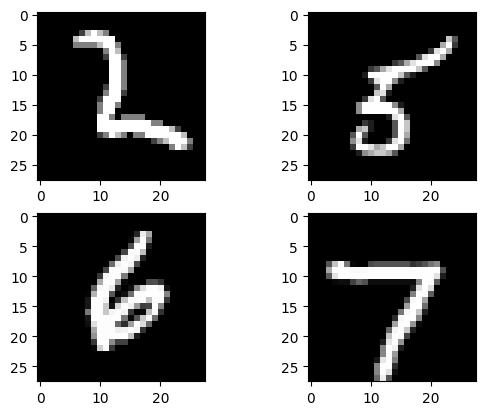

input shape :  torch.Size([100, 1, 28, 28]) 	Output shape :  torch.Size([100])


In [49]:
#examples = iter(train_loader)
#example_data,example_target = examples.next()
for example_data,example_target in train_loader :
  break;
for i in range(4) :
  plt.subplot(2,2,i+1)
  plt.imshow(example_data[i][0],cmap='gray')
plt.show()
print("input shape : ",example_data.shape,"\tOutput shape : ",example_target.shape)

In [50]:
class NeuralNet(nn.Module) :
  def __init__(self,input_size,hidden_size,num_classes) :
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  def forward(self,X) :
    out = self.l1(X)
    out = self.relu(out)
    out = self.l2(out)
    return out


In [51]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [52]:
from torchsummary import summary
summary(model, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 500]         392,500
              ReLU-2                  [-1, 500]               0
            Linear-3                   [-1, 10]           5,010
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.52
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


In [53]:
#criterion
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr =learning_rate)

In [54]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs ) :
  for i,(images,labels) in enumerate(train_loader) :
    #original shape : [ 100 , 1 , 28 , 28 ]
    #resized shape  : [ 100 , 784 ]
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs,labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i%100 == 0 :
      print("epoch : ",(epoch+1)/num_epochs,"\tstep : ",(i+1)/n_total_steps,"\tloss : ",loss.item())

epoch :  0.5 	step :  0.0016666666666666668 	loss :  2.2897191047668457
epoch :  0.5 	step :  0.16833333333333333 	loss :  0.4505823254585266
epoch :  0.5 	step :  0.335 	loss :  0.3656099736690521
epoch :  0.5 	step :  0.5016666666666667 	loss :  0.26376140117645264
epoch :  0.5 	step :  0.6683333333333333 	loss :  0.14887075126171112
epoch :  0.5 	step :  0.835 	loss :  0.23292680084705353
epoch :  1.0 	step :  0.0016666666666666668 	loss :  0.2746404707431793
epoch :  1.0 	step :  0.16833333333333333 	loss :  0.08425170183181763
epoch :  1.0 	step :  0.335 	loss :  0.10556036233901978
epoch :  1.0 	step :  0.5016666666666667 	loss :  0.17828470468521118
epoch :  1.0 	step :  0.6683333333333333 	loss :  0.1900148242712021
epoch :  1.0 	step :  0.835 	loss :  0.0460614338517189


In [66]:
#testing model

with torch.no_grad() :
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images,labels in test_loader :
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    _,predicted = torch.max(outputs,1)
    n_correct += (predicted == labels).sum().item()

acc = n_correct / n_samples
print("accuracy : ",acc*100)

accuracy :  96.93
